In [0]:
import numpy as np
import pandas as pd
seed = 25
np.random.seed(seed)

In [2]:
# uploading dataset
from google.colab import files
uploaded = files.upload()

Saving dataset_final5.csv to dataset_final5 (1).csv


In [3]:
# storing data in a dataframe
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset_final5.csv']))
df.head()

,filename,genre,chroma_stft,spec_cent,spec_bw,rolloff,zcr,bpm,rms,mfcc1,...,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49,mfcc50
0,hiphop.00039.wav,hiphop,0.392812,2693.202928,2937.743987,5976.540527,0.111564,95.703125,0.184535,-120.936802,...,-4.544398,-1.116098,-0.442828,1.368081,-1.351025,1.062983,-1.365897,-0.282049,-3.322343,-2.491533
1,classical.00008.wav,classical,0.254753,1516.831118,1629.756432,2974.121717,0.078778,135.999178,0.034045,-292.060391,...,-3.128277,-4.105968,-2.829742,-4.551546,-3.399555,0.326640,-0.111041,1.113019,-11.700742,-8.149296
2,country.00065.wav,country,0.282832,894.163206,1195.504133,1638.879933,0.038668,123.046875,0.110570,-250.869250,...,-1.986717,-2.687421,-6.502090,-3.036567,-3.380589,-6.804494,-3.721581,-4.942162,-2.600114,-0.758590
3,rock.00099.wav,rock,0.358401,1609.795082,1797.213044,3246.908930,0.076305,123.046875,0.054454,-235.161996,...,3.197235,-0.324466,1.586878,-2.962916,-2.659141,-3.414244,-9.300236,-3.464518,1.290004,-3.394978
4,country.00031.wav,country,0.313399,2053.229089,2187.759412,4094.556061,0.095325,112.347147,0.100855,-130.462863,...,-2.419361,0.125743,-1.987918,-2.968017,-5.894993,-7.130352,-2.982234,-1.969581,-5.291008,-8.074206


In [4]:
X = df.get_values()
Y = X[:,1] # genres
X = X[:,2:-20] # manually varying number of mfccs to use a peak at 30 mfcc was achieved
print(X.shape)

(1000, 37)


In [5]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# splitting to train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=seed)
print(Y_test.shape)

# scaling data to have 0 mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(100,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lgreg = LogisticRegression(multi_class='ovr',solver='liblinear')
lgreg.fit(X_train,Y_train)
print("Train data accuracy: ",lgreg.score(X_train,Y_train),"Test data accuracy: ", lgreg.score(X_test,Y_test))

Train data accuracy:  0.7122222222222222 Test data accuracy:  0.78


In [7]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)
print("Train data accuracy: ",nb.score(X_train,Y_train),"Test data accuracy: ", nb.score(X_test,Y_test))

Train data accuracy:  0.49777777777777776 Test data accuracy:  0.52


In [8]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf') # testing various kernels
svm.fit(X_train,Y_train)
print("Train data accuracy: ",svm.score(X_train,Y_train),"Test data accuracy: ", svm.score(X_test,Y_test))

Train data accuracy:  0.8577777777777778 Test data accuracy:  0.76


In [9]:
# tuning svm
from sklearn.model_selection import GridSearchCV

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]

print("# Tuning hyper-parameters")
print()
clf = GridSearchCV(SVC(C=1), tuned_parameters, cv=5,
                       scoring='accuracy')
clf.fit(X_train, Y_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()


# Tuning hyper-parameters

Best parameters set found on development set:

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Grid scores on development set:

0.106 (+/-0.004) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.407 (+/-0.039) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.407 (+/-0.039) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.106 (+/-0.004) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.664 (+/-0.054) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [10]:
svm = SVC(C=12,gamma=1e-2,kernel='rbf') # further manually tuning C
svm.fit(X_train,Y_train)
print("Train data accuracy: ",svm.score(X_train,Y_train),"Test data accuracy: ", svm.score(X_test,Y_test))

Train data accuracy:  0.9433333333333334 Test data accuracy:  0.85


In [11]:
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.1 ,n_estimators=50)
gb.fit(X_train,Y_train)
print("Train data accuracy: ",gb.score(X_train,Y_train),"Test data accuracy: ", gb.score(X_test,Y_test))

Train data accuracy:  0.9944444444444445 Test data accuracy:  0.72


In [12]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train,Y_train)
print("Train data accuracy: ",qda.score(X_train,Y_train),"Test data accuracy: ", qda.score(X_test,Y_test))

Train data accuracy:  0.9722222222222222 Test data accuracy:  0.71


In [13]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,Y_train)
print("Train data accuracy: ",lda.score(X_train,Y_train),"Test data accuracy: ", lda.score(X_test,Y_test))

Train data accuracy:  0.6933333333333334 Test data accuracy:  0.73


In [14]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,Y_train)
print("Train data accuracy: ",rf.score(X_train,Y_train),"Test data accuracy: ", rf.score(X_test,Y_test))

Train data accuracy:  0.9988888888888889 Test data accuracy:  0.75


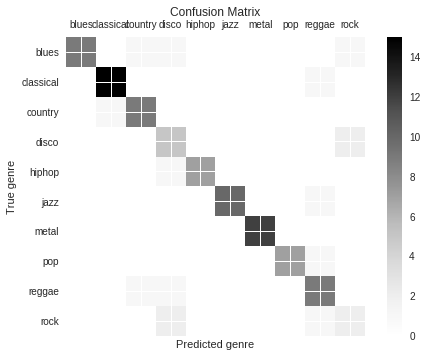

In [15]:
# SVM seems to perform exceptionally well
Y_pred = svm.predict(X_test)

# plotting confusion matrix of our classifier

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
 
labels = ['blues','classical','country', 'disco','hiphop', 'jazz', 'metal', 'pop','reggae', 'rock']

cm = confusion_matrix(Y_test,Y_pred,labels)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title("Confusion Matrix")
plt.colorbar(cax)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel("Predicted genre")
plt.ylabel("True genre")
plt.show()

In [0]:
# saving the model
import pickle

pickle.dump(svm,open('svm.sav','wb'))
pickle.dump(scaler,open('scaler.sav','wb'))

In [0]:
files.download('svm.sav')

In [0]:
files.download('scaler.sav')